# TF-IDF算法:

  我们在阅读文章时候，如果想知道文章的关键词是什么，有助于我们对文章类型的判断。如果是一片体育类文章，那么'球员'，'球队'，'比赛'等就是关键词，如果是金融类文章，那么'股票'，'投资','恒生指数'等就是关键词，这些词通常在这类文章中会经常出现，你可能会想到那就统计下文章中所有词语在文章出现的次数，如果是体育类文章，那么和体育相关的关键词出现的次数肯定会多，这就是我们说的词频，即TF(Term Frequency).
  但是仅仅靠词频并不能完全反映出词语在文中的重要性，比如说文章中经常出现的常用词，在足球文章中，会讨论中国足球队，那么'中国'这个词就会经常出现，在经济类文章中，会讨论中国的经济，那么'中国'这个词也会经常出现，那么
我们发现我们统计最多的词是'中国',但这个词并不是判断文章类别的关键，我们就需要找寻其它办法，这就是我们要提到的IDF，即逆文档频率(Inverse Document Frequency),IDF表示一个词如果在很多文档中都出现，那么它的价值就比较低，这说明它很可能是个常用词汇，并不能是反应文章类别的关键词，这类常用词，我们就要在词频的基础上，重新给予它一定的权重。我们用IDF来反应这个权重。
  我们看下计算IDF的公式 
  
  <center>$IDF_i = log\frac{N}{df_i + 1}$</center>
  
  
  其中$df_i$表示文档中包含这个词的文档的个数,例如有是十个文档都有'我'这个词，那么这个就是10。$df_i$这里边加1是防止除数为0,N表示的是文档的总数。那个这个公式表示一个词在很多文档都出现的话，那么得到得逆文档频率就小，反之就大。那么我们计算TF-IDF，就是词频和逆文档频率的乘积。
  
  我们用一个小例子来具体说明，如果有一些菜单文档，大概是这个样子：
  
               [['盐'，'胡椒','糖'], ['盐','糖','淀粉'], ['盐','小麦粉']]
            
  我们统计下词频的情况下：
  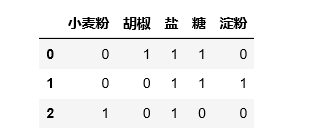
  
 
 
 
 
 
 
 
  我们计算TF-IDF，公式:
 
 
 
 
 
 
 
 <center>$W_{i,j} = df_{i,j} \times log\frac{N}{df_i + 1}$</center>
 
  
  这就是我们计算TF-IDF矩阵的计算方式，$W_{i,j}$是矩阵的每个元素，也就是每个词对应的tf-idf值
  具体实现代码如下:


In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

tf_mat = np.array([[0,1,1,1,0],[0,0,1,1,1],[1,0,1,0,0]])
n_doc = len(tf_mat)
sum_count = (tf_mat > 0).sum(0)
idf_mat = np.log((n_doc)/ (sum_count + 1)) + 1 #这里边求出对数再加1是防止出现负值，如果一个词在所有文档都包含会出现这个情况
tf_idf = tf_mat * idf_mat 

#每个文档向量的平方在开根号，就是每个文档向量的距离，做归一化处理
#一个10个字的文档，有个词出现次，和一个100个字的，出现某个词40次，
#不做归一化，这两者的比对就无法做出正确的判断
dis = np.sqrt(np.square(tf_mat).sum(1)).reshape(-1,1) + 1 
print(tf_idf / dis)

[[0.         0.51443593 0.26072646 0.3660254  0.        ]
 [0.         0.         0.26072646 0.3660254  0.51443593]
 [0.58216271 0.         0.29505175 0.         0.        ]]
